## Final Project Submission

Please fill out:
* Student name: Steven Rosa
* Student pace: part time
* Project review date/time: Monday 1 April 2019 11am ET
* Instructor name: Jeff Herman
* Blog post URL:


"Database for The Scratched Voices Begging to be Heard: The Graffiti of Pompeii and Today"

by Alexa Rose

https://core.tdar.org/dataset/445837/database-for-the-scratched-voices-begging-to-be-heard-the-graffiti-of-pompeii-and-today

<a id = 'top'></a>

# Contents
- Libraries and helper functions
- [A first look at the data](#obtain)
- [Cleaning the raw data](#scrub)
- [Exploratory data analysis](#explore)
- Modeling
 - [Model \#1](#model1)
 - [Model \#2](#model2)
 - [Model \#3](#model3)
- [Conclusions](#concl)

# Libraries and helper functions

In [1]:
import pandas as pd #For working with DataFrames
import matplotlib.pyplot as plt #For visualizing plots
import numpy as np #For mathematical operations
import random                   #for generating random numbers for train/test split
import copy                     #for making deep copies of mutable objects
from pandasql import sqldf #for manipulating DataFrames with SQL style queries
#for dividing data into a training set and a testing set
from sklearn.model_selection import train_test_split 
#For building regular logistic regression models
from sklearn.linear_model import LogisticRegression
#To view the ROC of a given class and  "area under the curve"
from sklearn.metrics import accuracy_score, roc_curve, auc
#For building decision trees
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#For visualizing decision trees:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#For assessing accuracy of logistic regression or decision trees
from sklearn.metrics import confusion_matrix 
import itertools #To iteratively append labels to cells in a confusion matrox


In [2]:
import time

In [3]:
#Function to draw in-line histograms
def inline_hists(xs, data, bins = 50):
    fig, axs = plt.subplots(1, len(xs), sharey=False, figsize=((5 * len(xs), 4)))
    for i, x in enumerate(xs):
        data[x].hist(ax=axs[i], label=x, xlabelsize=5, bins=bins)
        axs[i].legend()
    plt.show()

In [ ]:
#Thing for separating values by hyphen slash etc



In [ ]:
#Thing for getting indexes and filling values maybe



In [4]:
#Example function to visualize a confusion matrix without yellow brick
def plot_conf_matrix(cm, classes, normalize=False, 
                          title='Confusion Matrix', cmap=plt.cm.Blues):
#    if normalize:
#        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#        print("Matrix, normalized")
#    else:
#        print('Matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<a id = 'obtain'></a>

[(Back to top)](#top)

# A first look at the data

In [144]:
#Obtain the raw data
df_raw = pd.read_csv('graffiti.csv')



In [ ]:
df_raw.head(20)



In [ ]:
df_raw.info()



Columns to drop:

'found'
'org'?
'comments'?

Change 'Literacy' to integer before categorizing. Rename column.

Rename 'Image ' as 'Image'.

Categorical variables to transform: Reggio, Insula, Literacy, Context type specific, Context type general, Famous House (?), Socio-economic status


Null values to fill: Reggio, Insula, Entrance, Context type specific, Context type general, Famous House,

Target: 'Category'

<a id = 'scrub'></a>

[(Back to top)](#top)

# Cleaning the data

## Column by column

### 'CIL IV Pound sign'

In [6]:
df_raw['CIL IV #'] = df_raw['CIL IV #'].fillna(0)

### 'Reggio'

In [ ]:
df_raw['Reggio'].value_counts()

In [ ]:
print(df_raw['Reggio'].isna().sum())

In [145]:
#Fill NaN values
df_raw['Reggio'] = df_raw['Reggio'].fillna(0)
#Change 6_7 to 6
df_raw.at[994, 'Reggio'] = '6'
#Change data type to integer
df_raw['Reggio'] = df_raw['Reggio'].astype('float').astype('int')

Zero values can be filled later once more is known about the reggios.

### 'Insula'

In [ ]:
df_raw['Insula'].value_counts()

In [ ]:
df_raw['Insula'].value_counts().sum()

In [ ]:
df_raw['Insula'].isna().sum()

In [146]:
#Fill null values
df_raw['Insula'] = df_raw['Insula'].fillna(0)

#Replace the values with underscores
df_raw.at[985, 'Insula'] = '4'
df_raw.at[986, 'Insula'] = '4'
df_raw.at[983, 'Insula'] = '4'
df_raw.at[984, 'Insula'] = '4'
df_raw.at[988, 'Insula'] = '9'
df_raw.at[987, 'Insula'] = '8'
df_raw.at[982, 'Insula'] = '12'
df_raw.at[981, 'Insula'] = '1'

#Change data type to intger
df_raw['Insula'] = df_raw['Insula'].astype('float').astype('int')

### 'Entrance'

In [ ]:
df_raw['Entrance'].value_counts()

In [147]:
#Fill null values
df_raw['Entrance'] = df_raw['Entrance'].fillna('unknown')

#Replace all values with underscores or hyphens
#Dict to fill values from 'Entrance'
entrance_replacements = dict()
entrance_values = df_raw['Entrance'].value_counts()

#Iterate over Entrance values to look for underscore and hyphen
#Make a dict with values to replace the _/- values in the dataframe
#I'm choosing to take the first numerical value from each pair
for index in entrance_values.index:
        if '_' in index:
            index_split = index.split('_')
            entrance_replacements[index] = index_split[0]
        elif '-' in index:
            index_split = index.split('-')
            entrance_replacements[index] = index_split[0]
            
df_raw['Entrance'] = df_raw['Entrance'].replace(entrance_replacements)

#Change 'F' to 'f'
df_raw.at[661, 'Entrance'] = df_raw.at[661, 'Entrance'].lower()
#Change '4/5/' to '4'
df_raw.at[6, 'Entrance'] = '4'
#Replace 'I' and '?'
df_raw['Entrance'] = df_raw['Entrance'].replace({'I': 'i', '?': 'unknown'})

This is better, but it may have to be categorized.

### 'found?'

In [ ]:
df_raw['found?'].isna().sum()

In [13]:
#Can just be dropped
df_raw.drop(['found?'], axis = 1, inplace = True)

### 'In English'

In [ ]:
df_raw['In English'].isna().sum()

In [148]:
#Fill nulls so that they can be read
df_raw['In English'] = df_raw['In English'].fillna('')

#Rows with null values or unhelpful 'CHECK' values
blank_indexes = df_raw.index[df_raw['In English'] == '']
check_indexes = df_raw.index[df_raw['In English'] == '[CHECK]']

#Drop the empty rows. They aren't useful if they don't have the English text of the graffiti.
df_raw.drop(blank_indexes, inplace = True)
df_raw.drop(check_indexes, inplace = True)

### 'org. '

In [ ]:
df_raw['org. '].value_counts()[:10]

In [149]:
#Won't be useful here. Can be dropped.
df_raw.drop(['org. '], axis = 1, inplace = True)

### 'Literacy'

In [ ]:
df_raw['Literacy (1-3)'].value_counts()

In [ ]:
df_raw['Literacy (1-3)'].isna().sum()

In [150]:
#Rename column
df_raw = df_raw.rename(index=str, columns = {'Literacy (1-3)': 'Literacy'})

#Turn the few 1 values into 2s.
df_raw['Literacy'] = df_raw['Literacy'].replace({1.0: 2})

#Fill nulls
df_raw['Literacy'] = df_raw['Literacy'].fillna(2)

#Turn floats into integers
df_raw['Literacy'] = df_raw['Literacy'].astype('float').astype('int')

### 'In org. language'

In [ ]:
df_raw['In org. language'].value_counts().sum()

In [151]:
#Dropping for now
df_raw.drop(['In org. language'], axis = 1, inplace = True)

Not sure what to do with this at this point.

### 'Context type general'

In [ ]:
df_raw['Context type general'].value_counts()

In [ ]:
df_raw['Context type general'].isna().sum()

In [152]:
# No specific, no general, no reggio, insula
no_spec_no_gen = df_raw[df_raw['Context type specific'].isna() & df_raw['Context type general'].isna()]

no_spec_no_gen[(no_spec_no_gen['Reggio'] == 0) & (no_spec_no_gen['Insula'] == 0)].shape

#Must drop the 43 rows that don't have a reggio, insula, specfic context or general context
to_drop = no_spec_no_gen[(no_spec_no_gen['Reggio'] == 0) & (no_spec_no_gen['Insula'] == 0)]
df_raw.drop(to_drop.index, axis = 0, inplace = True)

#Maybe famous house can fill in for general context where it's missing?
famoushouse_nogen = df_raw[
    (df_raw['Famous House'].notna())
    & 
    (df_raw['Context type general'].isna())]

#Get indexes of all rows without a gen context but with a famous house
indexes = famoushouse_nogen.index

famoushouse_gencontexts = {
    'Praedia ': 'building',
    'Basilica': 'basilica',
    'House of': 'house',
    'house of': 'house',
    'Villa of': 'house',
    'Building': 'building',
    'near the Porta Vesuvio': 'necropolis',
    'Workshop': 'workshop'
}

#Replace gen context with the building type from its famous house
#Iterate over all the rows which have a famous house but lack a gen context
for index in indexes:
    #Iterate over the keys of famous houses
    for key, val in famoushouse_gencontexts.items():
        #If the row's famous house matches one from the dict
        if key in df_raw.at[index, 'Famous House']:
            #Fill missing gen context value with value from dict
            df_raw.at[index, 'Context type general'] = val
            
#Noticed that Bar of Sotericus has gen context of "house"
indexes = df_raw[df_raw['Famous House'] == 'Bar of Sotericus']['Context type general']
#Replace 'house' with 'bar' for these
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'bar'
    
#Noticed that 'Outside Porta Marina' had two NaN gen contexts to fix
#Will drop these because they're missing too many columns
df_raw.drop(['997', '998'], axis = 0, inplace = True)

#change all building types for spec context "workshop" to gen context "workshop"
indexes = df_raw[df_raw['Context type specific'] == 'workshop']
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'workshop'

#Same for 'Workshop'
indexes = df_raw[df_raw['Context type specific'] == 'Workshop']
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'workshop'

#Specific context "dining room" to general context "house"
indexes = df_raw[
    (df_raw['Context type specific'] == 'dining room')
    & 
    (df_raw['Context type general'].isna())]
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'house'

#Spec context "shop" to general context "shop"
indexes = df_raw[
    (df_raw['Context type specific'] == 'shop')
    & 
    (df_raw['Context type general'].isna())]
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'shop'
    
#Spec context "kitchen" to general context "house"    
indexes = df_raw[
    (df_raw['Context type specific'] == 'kitchen')
    & 
    (df_raw['Context type general'].isna())]
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'house'    
    
#Add consistency to a few of the values
replacements = {'Baths': 'baths',
                'unit': 'apartment'}
df_raw['Context type general'] = df_raw['Context type general'].replace(replacements)

#Fill null values
df_raw['Context type general'] = df_raw['Context type general'].fillna('unknown')

#Changing the name of the column
df_raw = df_raw.rename(index=str, columns ={
              'Context type general': 'Building Type'})

### 'Context type specific'

In [ ]:
df_raw['Context type specific'].value_counts()

In [ ]:
#Rows with a spec context but not a building type
df_raw['Context type specific'][
    (df_raw['Context type specific'].notna())
    & 
    (df_raw['Building Type'].isna())].value_counts()

In [ ]:
#Reggio and insula for rows with a spec context but not a building type
regIns = df_raw[['Reggio', 'Insula']][
    (df_raw['Context type specific'].notna())
    & 
    (df_raw['Building Type'].isna())]

regins_tuples = []
for row in regIns.index:
    regins_tuples.append(tuple((regIns.at[row, 'Reggio'], regIns.at[row, 'Insula'])))
    
#These reggios and insulae can be looked up for building type
set(regins_tuples)    

In [ ]:
#Rows with no spec context but a building type
regIns = df_raw[['Reggio', 'Insula']][
    (df_raw['Context type specific'].isna())
    & 
    (df_raw['Building Type'].notna())]

In [ ]:
regIns.shape # It's probably good enough that these all have a Building Type

In [153]:
#Add consistency to values
replacements = {'façade': 'facade',
                'tablinium': 'tablinum',
                'Workshop': 'workshop'
                }

df_raw['Context type specific'] = df_raw['Context type specific'].replace(replacements)

#Fill null values
df_raw['Context type specific'] = df_raw['Context type specific'].fillna('unknown')

#Rename column
df_raw = df_raw.rename(index=str, columns ={'Context type specific': 'Position'})

### 'Famous House'

In [ ]:
df_raw['Famous House'].value_counts()[60:90]

In [ ]:
df_raw['Famous House'].isna().sum()

In [154]:
#Turn this column into a 0/1 for no/yes
indexes = df_raw[df_raw['Famous House'].notna()]

for index in indexes.index:
    df_raw.at[index, 'Famous House'] = 1
    
df_raw['Famous House'] = df_raw['Famous House'].fillna(0)

df_raw['Famous House'] = df_raw['Famous House'].astype('int')

In [ ]:
#save for later?
#df_raw[(df_raw['Building Type'].isna()) & (df_raw['Famous House'] == 0)]

### Target: 'Category'

In [ ]:
df_raw['Category'].value_counts()

In [155]:
#Replace all values with back slashes
#Dict to fill values from 'Category'
cat_replacements = dict()
cat_values = df_raw['Category'].value_counts()

#Iterate over Category values to look for underscore and hyphen
#Make a dict with values to replace the _/- values in the dataframe
#I'm choosing to take the first value from each pair
for index in cat_values.index:
        if '/' in index:
            index_split = index.split('/')
            cat_replacements[index] = index_split[0]
            
df_raw['Category'] = df_raw['Category'].replace(cat_replacements)

#This creates one instance of 'Political' with a space
df_raw['Category'] = df_raw['Category'].replace({'Political ': 'Political'})

#Fill null values
df_raw['Category'] = df_raw['Category'].fillna('unknown')

### 'Written by'

In [26]:
df_raw['Written by'].value_counts()

unknown                                     895
Virgil                                       43
children?                                     8
Ovid                                          5
Ennius                                        5
woman                                         4
Lucretius                                     4
two writers                                   2
Woman                                         2
woman?                                        2
Homer                                         1
at least 3 young writers                      1
multiple                                      1
Menander, sentenia                            1
Written by two writers                        1
possibly 2 writers                            1
Antheros                                      1
Herodutus                                     1
Foreign                                       1
? Popular poem                                1
Horace                                  

In [156]:
#Fill null values first so str.contains can be used
df_raw['Written by'] = df_raw['Written by'].fillna('unknown')

#Clean up instances of ovid
ovids = df_raw[df_raw['Written by'].str.contains('Ovid', regex = False, case = False)]
for index in ovids.index:
    df_raw.at[index, 'Written by'] = 'Ovid'

#Clean up instances of virgil    
virgils = df_raw[df_raw['Written by'].str.contains('rgil', regex = False, case = False)]
for index in virgils.index:
    df_raw.at[index, 'Written by'] = 'Virgil'

#People who look like real writers as taken from value_counts    
writers = ['Antheros', 'Ennius', 'Epaphra', 
           'Virgil', 'Horace', 'Homer', 
           'Herodotus', 'Lucretius', 'Menander',
           'Ovid', 'poem', 'Propertius',
           'Salvius', 'Senica', 'Tibutinus']
                
#Iterate over all rows to replace values with 1 for a writer
#or zero for no writer
for index in df_raw.index:
    if any(writer in df_raw.at[index, 'Written by'] for writer in writers):
        df_raw.at[index, 'Written by'] = 1
    else:
        df_raw.at[index, 'Written by'] = 0
        
#Change name of column to 'Writer'
df_raw = df_raw.rename(index=str, columns ={'Written by': 'Writer'})

### 'Work', 'Meter', and 'Reptition'

In [166]:
#Change 'Work' to 0/1 no/yes
indexes = df_raw[df_raw['Work'].notna()]
for index in indexes.index:
    df_raw.at[index, 'Work'] = 1    
df_raw['Work'] = df_raw['Work'].fillna(0)


#Change meter to 0/1 no/yes  
indexes = df_raw[df_raw['Meter'].notna()]
for index in indexes.index:
    df_raw.at[index, 'Meter'] = 1    
df_raw['Meter'] = df_raw['Meter'].fillna(0)  

#Smush together Writer Work and Meter
indexes = df_raw[(df_raw['Writer'] == 0)
        &
        (
            (df_raw['Work'] == 1) 
            | 
            (df_raw['Meter'] == 1)
        )]

for index in indexes.index:
    df_raw.at[index, 'Writer'] = 1
    
#Reassign the category for these smushed together 
indexes = df_raw[df_raw['Writer'] == 1]

for index in indexes.index:
    df_raw.at[index, 'Category'] = 'Reference'

#Reset data type for Writer to int    
df_raw['Writer'] = df_raw['Writer'].astype('int')

#Meter, Work and Repetition can be dropped
df_raw.drop(['Meter', 'Work', 'Repetition'], axis = 1, inplace = True)

In [57]:
#Move literary graffiti from these other categories into "reference"
#Insult       21
#Religious    17
#Social       12
#Romantic     12
#Sexual       12
#Civic         5
#Tagging       2
#Violence      1
#Political     1

#Get all rows which are yes for either Writer, Work, or Meter,
#but which aren't yet in the Reference category
#indexes = df_raw['Category'][(df_raw['Category'] != 'Reference')
#        &
#        (
#            (df_raw['Writer'] == 1) 
#            |
#            (df_raw['Work'] == 1) 
#            | 
#            (df_raw['Meter'] == 1)
#        )]

#for index in indexes.index:
#    df_raw.at[index, 'Category'] = 'Reference'

### 'Foreign language'

In [ ]:
df_raw['Foreign language'].value_counts()

In [ ]:
df_raw['Foreign language'].isna().sum()

In [16]:
#Can be dropped
df_raw.drop(['Foreign language'], axis = 1, inplace = True)

### 'Image '

In [66]:
#Get rid of the annoying space in the name
df_raw = df_raw.rename(index=str, columns = {'Image ': 'Image'})

#Fill nulls first so str.contains can be used
df_raw['Image'] = df_raw['Image'].fillna('none')

#Get all rows with gladiator in the image description
gladiators = df_raw[df_raw['Image'].str.contains('gladiator', regex = False, case = False)]

for index in gladiators.index:
    df_raw.at[index, 'Category'] = 'Violence'
    
#Drop the column
df_raw.drop(['Image'], axis = 1, inplace = True)

### 'Flohr Score'

In [70]:
df_raw['Flohr Score'].value_counts()

5.59     63
28.91    24
30.21    20
65.59    19
42.14    18
53.05    17
32.3     16
22.95    11
2.39     10
5.54     10
80.58    10
15.97     9
1.69      9
13.73     8
16.95     7
7.87      7
72.25     7
9.47      7
22.84     7
8.74      7
56.73     7
26.49     6
28.6      6
20.85     6
39.4      5
31.34     5
52.54     5
8.53      5
22.45     5
5.77      5
         ..
12.77     1
2.96      1
6.14      1
2.23      1
17.98     1
1.71      1
15.28     1
8.37      1
7.58      1
10.43     1
15.9      1
1.66      1
6.12      1
13.74     1
1.76      1
10.59     1
7.19      1
4.2       1
9.08      1
7.46      1
3.97      1
2.71      1
14.81     1
14.96     1
8.94      1
8.49      1
15.29     1
1.8       1
10.88     1
3.38      1
Name: Flohr Score, Length: 147, dtype: int64

In [69]:
#Replace all values with hyphens.
#Dict to fill values from 'Flohr Score'
flohr_replacements = dict()
flohr_values = df_raw['Flohr Score'].value_counts()

#Iterate over values to look for hyphen
#Make a dict with values to replace the - values in the dataframe
#I'm choosing to take the first numerical value from each pair
for index in flohr_values.index:
        if '-' in index:
            index_split = index.split('-')
            flohr_replacements[index] = index_split[0]
            
df_raw['Flohr Score'] = df_raw['Flohr Score'].replace(flohr_replacements)

#Get indexes for empty Flohr scores at each SES level
low = df_raw[
        (df_raw['Socio-economic status'] == 'low')
        &
        (df_raw['Flohr Score'].isna())   ]
med = df_raw[
        (df_raw['Socio-economic status'] == 'medium')
        &
        (df_raw['Flohr Score'].isna())]
high = df_raw[
        (df_raw['Socio-economic status'] == 'high')
        &
        (df_raw['Flohr Score'].isna())]

#Then fill null values with zeros so that means can be taken
df_raw['Flohr Score'] = df_raw['Flohr Score'].fillna(0.0)

#Change strings to floats
df_raw['Flohr Score'] = df_raw['Flohr Score'].astype('float')

#Get the average Flohr score for low SES rows
low_avg = np.array(df_raw['Flohr Score'][df_raw['Socio-economic status'] == 'low']).mean()
#Get the average Flohr score for medium SES rows
med_avg = np.array(df_raw['Flohr Score'][df_raw['Socio-economic status'] == 'medium']).mean()
#Get the average Flohr score high SES rows
high_avg = np.array(df_raw['Flohr Score'][df_raw['Socio-economic status'] == 'high']).mean()

#Update the FLohr score for low SES rows
for index in low.index:
    df_raw.at[index, 'Flohr Score'] = low_avg
#Update the FLohr score for medium SES rows
for index in med.index:
    df_raw.at[index, 'Flohr Score'] = med_avg
#Update the FLohr score for high SES rows
for index in high.index:
    df_raw.at[index, 'Flohr Score'] = high_avg

### 'Socio-economic status'

In [ ]:
df_raw['Socio-economic status'].value_counts()

In [72]:
df_raw['Socio-economic status'] = df_raw['Socio-economic status'].fillna('medium')

### 'comments'

In [95]:
df_raw['comments'].value_counts()


References emperor later than Nero                          1
famous performer                                            1
odd comment on entry, unsure how to parse                   1
largest collection of graffiti in private space             1
negative attitude towards graffiti?                         1
first two and last two words crossed out                    1
accent                                                      1
Name of known prostitute                                    1
70 pieces found in this house                               1
second word of uncertian meaning                            1
Aphrodite references name, not godess                       1
Hints at gay sex                                            1
Didactic model for hexameter learning                       1
political?                                                  1
possible original variant                                   1
Hints at lesbian sex                                        1
Uncertia

In [96]:
#interesting, further investigation could lead ot help with categorizing, but will drop for now
df_raw.drop(['comments'], axis = 1, inplace = True)

<a id = 'explore'></a>

[(Back to top)](#top)

# Exploratory data analysis

What is a reggio?

What is an insula?

From https://sites.google.com/site/ad79eruption/pompeii/map-of-pompeii

"Pompeii, however, has an additional level of numbering. It has been divided firstly into 9 regions (Regio), numbered in Roman numerals. Each of these regions contains several Insulae which are numbered 1, 2 3, etc. As with Herculaneum, each building within an insula has its own entrance number, again numbered 1, 2, 3 etc. For example, the House of Trebius Valens is labelled (Reg III, Ins 2, 1)."

In [33]:
df_raw['Category'].value_counts()

Social       225
Sexual       199
Insult       160
Civic         84
Reference     73
Romantic      62
Tagging       61
Religious     60
Violence      35
Political     23
unknown       16
Name: Category, dtype: int64

### Adding a character count and imperative column

'Characters' will measure the length of the text of each graffito in English. 'Imperative' will count whether it has exclamation points or not.

In [195]:
#Create Characters and Imperative columns
for index in df_raw.index:
    df_raw.at[index, 'Characters'] = len(df_raw.at[index, 'In English'])
    if '!' in df_raw.at[index, 'In English']:
        df_raw.at[index, 'Imperative'] = 1
    else: 
        df_raw.at[index, 'Imperative'] = 0
df_raw['Characters'] = df_raw['Characters'].astype('int')
df_raw['Imperative'] = df_raw['Imperative'].astype('int')

In [197]:
df_raw['Characters'] = df_raw['Characters'].astype('int')
df_raw['Imperative'] = df_raw['Imperative'].astype('int')

### Examining key words

I'm unhappy with the categories and think I can do better. I've browsed the English translations of the graffiti and have spotted some key words that I want to count the incidence of across the categories. This may suggest some more precise categories for the data. It may also allow more even data distribution across categories.

In [194]:
#For looking at keywords
df_raw[df_raw['Category'] == 'Social'][200:]


CIL IV #  Reggio  Insula Entrance found?  \
962       NaN       7      16       20    NaN   
963       NaN       7      16       20    NaN   
964       NaN       7      16       20    NaN   
968       NaN       7      16       17    NaN   
981      1593       4       1  unknown    NaN   
984      8849       3       4  unknown    NaN   
987      3779       9       8  unknown    NaN   
989      7866       9       0       11    NaN   
991      2167       7       0  unknown    NaN   
993      1604       9       0  unknown    NaN   
1000     1216       0       0  unknown    NaN   
1033     9149       0       0  unknown    NaN   

                                             In English  Literacy  \
962   Secundus sends very many and everlasting greet...         3   
963                              To Marcus Fabius Rufus         2   
964              To secundus lots of greetings lovingly         2   
968   Romula lives here with her friend. Romula live...         2   
981   Livia greets Alexander. I don't care much if y...         3   
984                                  When a poor man...         3   
987                         Inn of Gaius Hyginus Firmus         2   
989                                   Maria asks (this)         2   
991                                      I want to stay         2   
993   Look for Falax and Fabius in the decuria of Co...         3   
1000                             Greetings, Campanians!         2   
1033                              Bye, here, good luck!         2   

         Position Building Type  Famous House Category  Writer  \
962   dining room         house             1   Social       0   
963   dining room         house             1   Social       0   
964   dining room         house             1   Social       0   
968     peristyle         house             1   Social       0   
981       unknown       unknown             0   Social       0   
984    outer wall       unknown             0   Social       0   
987      entrance       unknown             0   Social       0   
989      entrance       unknown             0   Social       0   
991       unknown       unknown             0   Social       0   
993       unknown       unknown             0   Social       0   
1000       garden         house             1   Social       0   
1033      unknown         house             1   Social       0   

     Foreign language Image  Flohr Score Socio-economic status  \
962               NaN    NaN        5.54                   low   
963               NaN    NaN        5.54                   low   
964               NaN    NaN        5.54                   low   
968               NaN    NaN        32.3                medium   
981               NaN    NaN         NaN                   NaN   
984               NaN    NaN         NaN                  high   
987               NaN    NaN         NaN                   NaN   
989               NaN    NaN         NaN                   NaN   
991               NaN    NaN         NaN                  high   
993               NaN    NaN         NaN                   NaN   
1000              NaN    NaN         NaN                   NaN   
1033              NaN    NaN         NaN                   NaN   

            comments  Imperative  Characters  
962              NaN         NaN         NaN  
963              NaN         NaN         NaN  
964              NaN         NaN         NaN  
968              NaN         NaN         NaN  
981   Uncertian text         NaN         NaN  
984              NaN         NaN         NaN  
987              NaN         NaN         NaN  
989              NaN         NaN         NaN  
991              NaN         NaN         NaN  
993              NaN         NaN         NaN  
1000             NaN         NaN         NaN  
1033             NaN         NaN         NaN

In [187]:
df_raw[df_raw['In English'].str.contains('?', regex = False, case = False)]


CIL IV #  Reggio  Insula Entrance found?  \
68        1824       8       1        1    NaN   
84        1884       8       1        1    NaN   
88        1837       8       1        1    NaN   
115       1895       8       1        1    NaN   
125       1780       8       1        2    NaN   
257       5011       9       2       26    NaN   
440       7038       5       6  unknown    NaN   
442       1650       7       6       28    NaN   
446       9005       7       6        7    NaN   
458       4957       8       6        6    NaN   
562  4966_4967       8       7       19    NaN   
608       5213       9       8        3    NaN   
681       8347       1      10        4    NaN   
744       9099       9      11        2    NaN   
745       9100       9      11        3    NaN   
821       2253       7      12       18    NaN   
889       4509       6      14       20    NaN   

                                            In English  Literacy   Position  \
68   Anyone who is in love: come! I want to break V...         3    unknown   
84   He who visited my cock, what do you think he h...         3    unknown   
88   If you can but do not want to, why are the del...         3    unknown   
115  What can be so hard as a rock? What softer tha...         3    unknown   
125          What shall I do with you, twinkling eyes?         3    unknown   
257                 Reader or Mathematician or rhetor?         2   entrance   
440  Dumping shit by the wall? Keep walking! If you...         3    unknown   
442  Gaius Julius Primigenius..here. And you, what ...         3     atrium   
446  What are you doing traveller? The gorge is moist.         3  peristyle   
458  We have wet the bed. We admut: our bad, host! ...         2    unknown   
562  What is happening? After you, my eyes, have dr...         3    unknown   
608  You horny son! How many women did you fuck dee...         3     atrium   
681  Crescens greets Chryseros. How is your little ...         3    kitchen   
744                          Sulla the happy? Unhappy!         2     facade   
745                          Sulla the happy? Unhappy!         2     facade   
821  The bill? If you give it to me, Batacarus, I w...         3    unknown   
889  Who forbids love?/Who keeps a watch on lovers?...         3  peristyle   

    Building Type  Famous House   Category  Writer Foreign language Image   \
68       basilica             1  Religious       0              NaN    NaN   
84       basilica             1  Reference       1              NaN    NaN   
88       basilica             1   Romantic       0              NaN    NaN   
115      basilica             1  Reference       1              NaN    NaN   
125      basilica             1  Reference       1              NaN    NaN   
257         house             0      Civic       0              NaN    NaN   
440       unknown             0     Insult       0              NaN    NaN   
442         house             1     Sexual       0              NaN    NaN   
446         house             0     Insult       0              NaN    NaN   
458           inn             0  Reference       1              NaN    NaN   
562       theatre             0  Reference       1              NaN    NaN   
608         house             1     Sexual       0              NaN    NaN   
681         house             1     Social       0              NaN    NaN   
744       unknown             0     Insult       0              NaN    NaN   
745       unknown             0     Insult       0              NaN    NaN   
821       brothel             0     Insult       0              NaN    NaN   
889         house             1   Romantic       0              NaN    NaN   

    Flohr Score Socio-economic status comments  
68          NaN                   low      NaN  
84          NaN                   low      NaN  
88          NaN                   low      NaN  
115         NaN                   low      NaN  
125         NaN                 

the girls 6

slave 25


Nero 16


Love:
    'venus'

Hello and Goodbye:
    'greet' (69)
    'bye' (53), some lewd

Glory:
    'soldier'
    'fight'
    'victor'
    'mars' 4

Leave most 'Insult'

"Lewd": 
    'suck' 49
    'fuck'
    'cunt'
    'cock'
    'bugger'
    'faggot' 15
    
Blessing:
    'best wishes'
    'favor'
    'favour'
    'good luck'
    'bravo' 5
    happy 10
    
Curse:
    All of insult?
    'beware' (not very many)
    'anger'

In [ ]:
#Build data frame with key words as rows and categories as columns
#e.g. 
#             Social   Political   Sexual &c
#   'soldier'  1         0 .         2
#    'fight'   3 .        0 .       1
#    'victor'
#    'mars'

#Need a list of the names of the categories
#Need a list of hte names of hte key words

In [206]:
list(df_raw['Category'].unique())

['Religious',
 'Civic',
 'Insult',
 'Reference',
 'Tagging',
 'Social',
 'Sexual',
 'Romantic',
 'unknown',
 'Political',
 'Violence']

In [202]:
#A lambda function with the "globals" so I don't have to pass them in every time
pysqldf = lambda q: sqldf(q, globals())

#A list of category names
categories = list(df_raw['Category'].unique())

#A list of key words
keywords = [the girls 6

'slave', 'Nero'
            'love'
    'venus'
'hello', 'goodbye', 'bye'
            
Glory:
    'soldier'
    'fight'
    'victor'
    'mars' 

Leave most 'Insult'


    'suck', 
    'fuck'
    'cunt'
    'cock'
    'bugger'
    'faggot' 15
    
Blessing:
    'best wishes'
    'favor'
    'favour'
    'good luck'
    'bravo' 5
    happy 10
    
Curse:
    All of insult?
    'beware' (not very many)
    'anger'
    
]

In [203]:
q = '''SELECT [In English]
        FROM df
'''

In [204]:
in_english = pysqldf(q)
in_english

In English
0         By the holy gods of the house, I ask you to…
1                                UXBUCTDSERFOGPHOFMKNL
2                                      Brutus is a dog
3                                   Of arms and a man…
4    Saggita, the emperor's slave, the little Pompeian
5                           Maximus (greets) his Irene
6                   Arrunitis was here with Tiburtinus
7                                         It's raining
8                          Petronius, you fuck Pyramus
9                                     All fell silent…
10                                If someone is loved…
11            Supremus, faggot: 4 a(sses). Bye, pussy!
12               I sing the greatest songs of the man…
13          The phallus of Crescens: hard and gigantic
14               Aphrodite, mistress   Euche, mistress
15                                     Genialis, Euche
16    All fell silent ... if one shakes, she shakes...
17            Felicia, a house born slave, for 2 asses
18       Menandner, with a good character, for 2 asses
19   Successa, a house born slave, 5, with a good c...
20                     Daphnicus ... here with Felicla
21                           Here I fucked twice [...]
22   Long live whoever loves! Awar with him, who do...
23                      Staphylus ... here with Quieta
24                         Room of Rufinus. Greetings.
25   Even if you devour me up to my roots, still I ...
26                   It is not me, I do not laze about
27                                And adressing him...
28   Primigenius [...] Mystes sends greetings to hi...
29       Hay brought the 18th of October, [...] pounds
..                                                 ...
964                  We came here desiring, much more…
965                                Chaste nymph, burn!
966                      Epaphroditus…here with Thalia
967                          EPAPHRODITVS EPAPHRODITVS
968  Happy the man who will sleep with you tonight!...
969  If only I could be a gem, for as much as one h...
970                       Sweet it is on the wide sea…
971  We came here desiring, much more we desire to ...
972                                           Whoever…
973  you ask back, beautiful gir, the kisses that I...
974  Livia greets Alexander. I don't care much if y...
975                                         Big Expert
976                      If time (...) me something...
977                                 When a poor man...
978                              Shitter, beware evil!
979                       Felix, you're taking a shit!
980                        Inn of Gaius Hyginus Firmus
981                                        Anthus cock
982                                  Maria asks (this)
983                              ABCDEFGHIKLMNOPQRSZVX
984                                     I want to stay
985                                   Rufilla sucks it
986  Look for Falax and Fabius in the decuria of Co...
987  Marcus Cerrinius (Vatia) as aedile! One loves ...
988                                         [alphabet]
989                                         It's rufus
990                                              Muse!
991                             Greetings, Campanians!
992  My Ceres, long live whoever loves and an ill e...
993                              Bye, here, good luck!

[994 rows x 1 columns]

<a id = 'model1'></a>

[(Back to top)](#top)

# Modeling: Model \#1

In [97]:
df = copy.deepcopy(df_raw)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1033
Data columns (total 13 columns):
CIL IV #                 994 non-null object
Reggio                   994 non-null int64
Insula                   994 non-null int64
Entrance                 994 non-null object
In English               994 non-null object
Literacy                 994 non-null int64
Position                 994 non-null category
Building Type            994 non-null category
Famous House             994 non-null category
Category                 994 non-null object
Foreign language         27 non-null object
Flohr Score              994 non-null float64
Socio-economic status    994 non-null object
dtypes: category(3), float64(1), int64(3), object(6)
memory usage: 90.0+ KB


In [ ]:
#Remaining empty reggio and insula rows   
indexes = df_raw[
    (df_raw['Reggio'].isna())
    & 
    (df_raw['Building Type'].isna())]
for index in indexes.index:
    df_raw.at[index, 'Context type general'] = 'house'    

## Logistic regression in progress

In [103]:
#Make categories
df['Position'] = df['Position'].astype('category')
df['Building Type'] = df['Building Type'].astype('category')
df['Famous House'] = df['Famous House'].astype('bool').astype('category')
#df['Literature'] = df['Literature'].astype('bool').astype('category')
df['Socio-economic status'] = df['Socio-economic status'].astype('category')
df['Category'] = df['Category'].astype('category')

In [108]:
#Get dummies
#entrance_dummies = pd.get_dummies(df_raw['Entrance'], prefix = 'Entrance')
position_dummies = pd.get_dummies(df['Position'], prefix = 'Position')
build_type_dummies = pd.get_dummies(df['Building Type'], prefix = 'Building_Type')
famous_dummies = pd.get_dummies(df['Famous House'], prefix = 'Famous')
#literary_dummies = pd.get_dummies(df_raw['Literary'], prefix = 'Literary')
econ_status_dummies = pd.get_dummies(df['Socio-economic status'], prefix = 'Econ_Status')

In [109]:
#What if I get dummies for y
category_dummies = pd.get_dummies(df['Category'], prefix = 'Category')

In [119]:
X = df.drop(['CIL IV #', 'Entrance', 'In English', 
             'Foreign language', 'Position', 'Building Type', 
             'Famous House', 'Category', 'Socio-economic status'
            ], axis = 1)
X = pd.concat([X, position_dummies, build_type_dummies, famous_dummies, econ_status_dummies], axis = 1)

In [120]:
#49 columns
X.head()

Reggio  Insula  Literacy  Flohr Score  Position_altar  Position_atrium  \
0       2       1         3     5.250497               1                0   
1       2       1         2    23.770000               0                0   
2       2       1         2     8.740000               0                0   
3       2       1         3     8.740000               0                0   
4       2       1         2     8.740000               0                0   

   Position_bath  Position_column  Position_counter  Position_dining room  \
0              0                0                 0                     0   
1              0                1                 0                     0   
2              0                0                 0                     0   
3              0                0                 0                     0   
4              0                0                 0                     0   

          ...          Building_Type_tabernae  Building_Type_temple  \
0         ...                               0                     0   
1         ...                               0                     0   
2         ...                               0                     0   
3         ...                               0                     0   
4         ...                               0                     0   

   Building_Type_theatre  Building_Type_unknown  Building_Type_workshop  \
0                      0                      1                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

   Famous_False  Famous_True  Econ_Status_high  Econ_Status_low  \
0             1            0                 0                1   
1             1            0                 0                0   
2             1            0                 0                1   
3             1            0                 0                1   
4             1            0                 0                1   

   Econ_Status_medium  
0                   0  
1                   1  
2                   0  
3                   0  
4                   0  

[5 rows x 49 columns]

In [121]:
y = df_raw['Category']

In [ ]:
#from sklearn doc
#from sklearn.preprocessing import label_binarize

#y = label_binarize(y, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#from sklearn doc
#Number of classes for which to get ROCs
#n_classes = y.shape[1]

In [122]:
#Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
#print(y_train.value_counts(),'\n', y_test.value_counts())

In [123]:
#Build a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg.fit(X_train, y_train)

/Users/ssrosa/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ssrosa/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_score = logreg.decision_function(X_test)

In [ ]:
#y_score.shape

In [124]:
#This works
y_hat = logreg.predict(X_train)

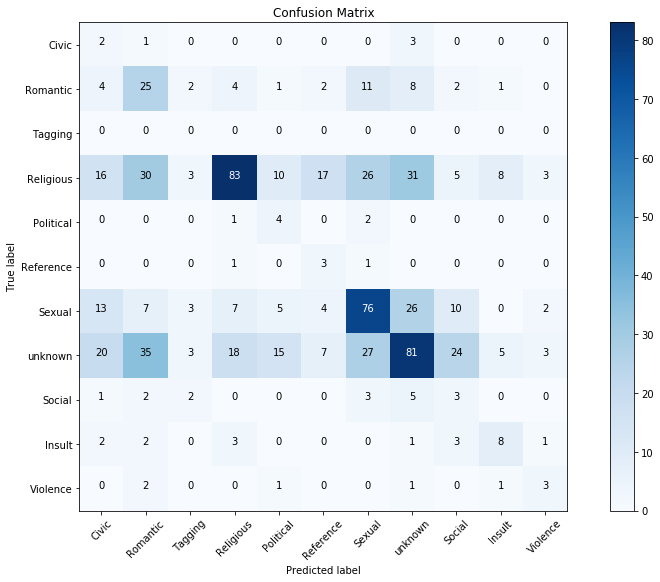

In [125]:
#Create a confusion matrix with the results
conf_matrix = confusion_matrix(y_hat, y_train)
#Create labels for the classes in the conf matrix
class_names = set(y)
#Draw a figure
plt.figure(figsize = (12,8))
#Call the custom function to draw the conf matrix
plot_conf_matrix(conf_matrix, classes = class_names)

This model does passably only on Romantic, Political,  Religious, and Sexual.

In [ ]:
y_train.value_counts()

<a id = 'model2'></a>

[(Back to top)](#top)

# Model \#2

## Decision tree in progress

In [127]:
# Create label encoder instance
lb = LabelEncoder() 

In [ ]:
df.info()

In [128]:
# Create Numerical labels for classes
df['Reggio_'] = lb.fit_transform(df['Reggio'])
df['Insula_'] = lb.fit_transform(df['Insula'])
df['Literacy_'] = lb.fit_transform(df['Literacy'])
df['Position_'] = lb.fit_transform(df['Position'])
df['Build_Type_'] = lb.fit_transform(df['Building Type'])
df['Famous_'] = lb.fit_transform(df['Famous House'])
#df['Literary_'] = lb.fit_transform(df['Literary'])
df['Econ_Status_'] = lb.fit_transform(df['Socio-economic status'])
#the target
df['Category_'] = lb.fit_transform(df['Category'])

In [129]:
class_names = set(df['Category'])

In [130]:
# Split features and target variable
X = df[['Reggio_', 'Insula_', 'Literacy_', 'Position_', 'Build_Type_', 'Famous_', 'Econ_Status_']]
y = df['Category_']

In [131]:
# Instantiate a one hot encoder
enc = OneHotEncoder()

In [132]:
# Fit the feature set X
enc.fit(X)

/Users/ssrosa/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [134]:
# Transform X to onehot array 
onehotX = enc.transform(X).toarray()

#onehotX, onehotX.shape, X.shape

In [135]:
# Create a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(onehotX, y, test_size = 0.3, random_state = 12)

In [136]:
# Train the classifier and make predictions
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train,y_train) 
y_hat = clf.predict(X_test)

In [137]:
# Calculate Accuracy 
acc = accuracy_score(y_test, y_hat) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :23.411371237458194


In [ ]:
# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print("\nAUC is :{0}".format(round(roc_auc,2)))

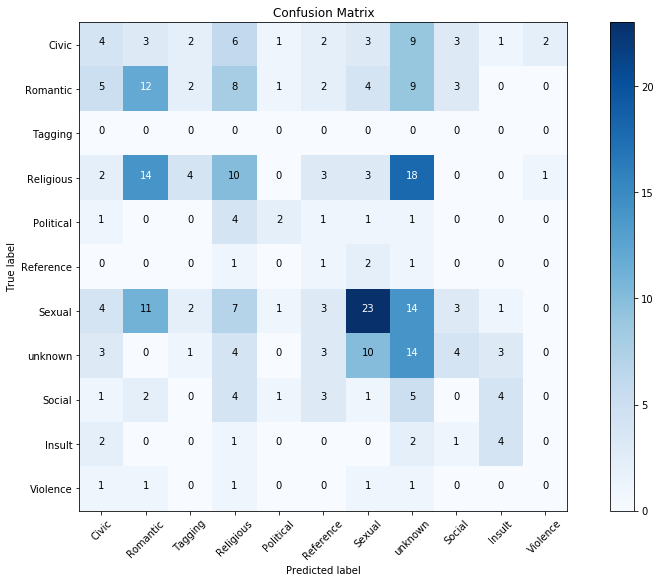

In [138]:
#Create a confusion matrix with the results
conf_matrix = confusion_matrix(y_hat, y_test)
#Create labels for the classes in the conf matrix
#or use labels created before y is encoded
#Draw a figure
plt.figure(figsize = (12,8))
#Call the custom function to draw the conf matrix
plot_conf_matrix(conf_matrix, classes = class_names)

This model performed similarly as poorly as the first logistic regression.

In [139]:
#And now an attempt to use Graph Viz
# Visualize the decision tree using graph viz library 
dot_data = StringIO()

In [140]:
#Feeds from decision tree classifier instantiated above
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True)

In [141]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [142]:
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.787138 to fit



<a id = 'model3'></a>

[(Back to top)](#top)

# Model \#3

<a id = 'concl'></a>

[(Back to top)](#top)

# Conclusions